In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Starr, Eliza (1420933)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

I experimented with following hyperparameter options: dense layers 3-9, nodes per layer 10-3000, epochs 3-50, and batch size 32-256. Accuracy decreases with 3 more layers with 1000, 2000, and 3000 nodes, and accuracy peaks at batch size 128 and decreases with 64 and 256. The model slightly overfits and accuracy begins to flatten past 40 epochs. The resulting model has an acceptable validation accuracy of 79%.  (length: 414)



Max val score: 78.98%


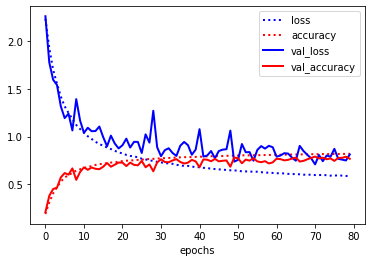

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 320)               983360    
_________________________________________________________________
dense_13 (Dense)             (None, 160)               51360     
_________________________________________________________________
dense_14 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_15 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_16 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(output*scale**5, input_dim=(3072,), activation='relu'))
    model.add(layers.Dense(output*scale**4, activation='relu'))
    model.add(layers.Dense(output*scale**3, activation='relu'))
    model.add(layers.Dense(output*scale**2, activation='relu'))
    model.add(layers.Dense(output*scale**1, activation='relu'))
    model.add(layers.Dense(output*scale**0, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



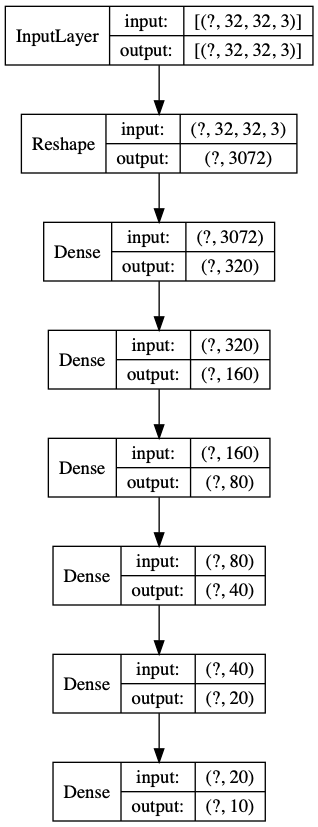

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

After grayscaling the images the model overfits the data far more, but the accuracy slightly improves to 82%. Perhaps color is not important to the classification task, therefore the model is ignoring any unimportant patterns found from colors. This also reduces the dimensionality and parameters of the model. In higer dimensions the curse of dimensionality makes data sparse and difficult to classify, and more parameters requires more training data to avoid overfitting.   (length: 476)



Max val score: 82.41%


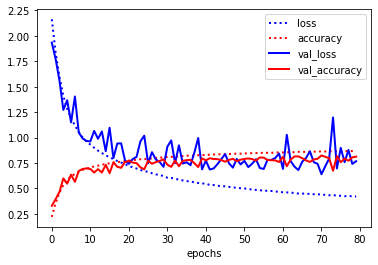

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 320)               328000    
_________________________________________________________________
dense_19 (Dense)             (None, 160)               51360     
_________________________________________________________________
dense_20 (Dense)             (None, 80)                12880     
_________________________________________________________________
dense_21 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_22 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

The best accuracy gain (to 83%) was achieved by adding a dropout layer with rate 0.2 before the last dense hidden layer, however this is not a large improvement. Adding other dropout layer combinations or kernel, bias, and activity regularizers of types l1, l2, and l1_l2 did not improve performance. I also tried to add batch normalization between dense layers and their activation functions, all combinations of which decreased validation accuracy.  (length: 452)



Max val score: 83.44%


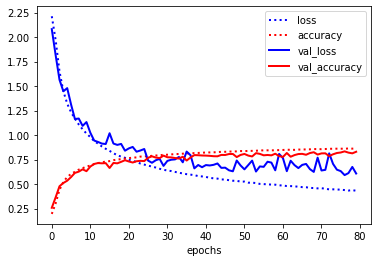

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32, 1)))
    model.add(layers.Dense(output*scale**5, input_dim=(1024,), activation='relu',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Dense(output*scale**4, activation='relu',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    #model.add(layers.Dropout(0.4))
    model.add(layers.Dense(output*scale**3, activation='relu',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(output*scale**2, activation='relu',
                           kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None))
    
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(output*scale**1,
       

In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

The model performs with 95% accuracy, a large improvement from the dense networks. I use three blocks of two covolutional layers, each with maxpooling, a dropout of 0.3, and zero-padding. The model uses a learning rate of 0.001 Maxpooling reduces resolution and increases translation invariance, dropout for regularization, and padding for building a deeper model. The smaller learning rate improved the accuracy just slightly. It should also be noted that accuracy levels off after only 4-5 epochs, while the loss continues to decrease slightly.  (length: 548)



Max val score: 94.82%


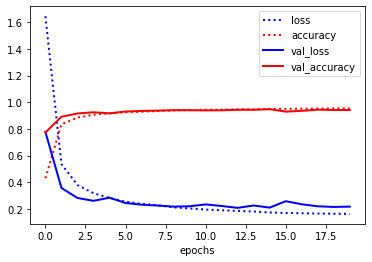

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)        

def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizers.RMSprop(lr=1e-3),
                loss='categorical_crossentropy',
               

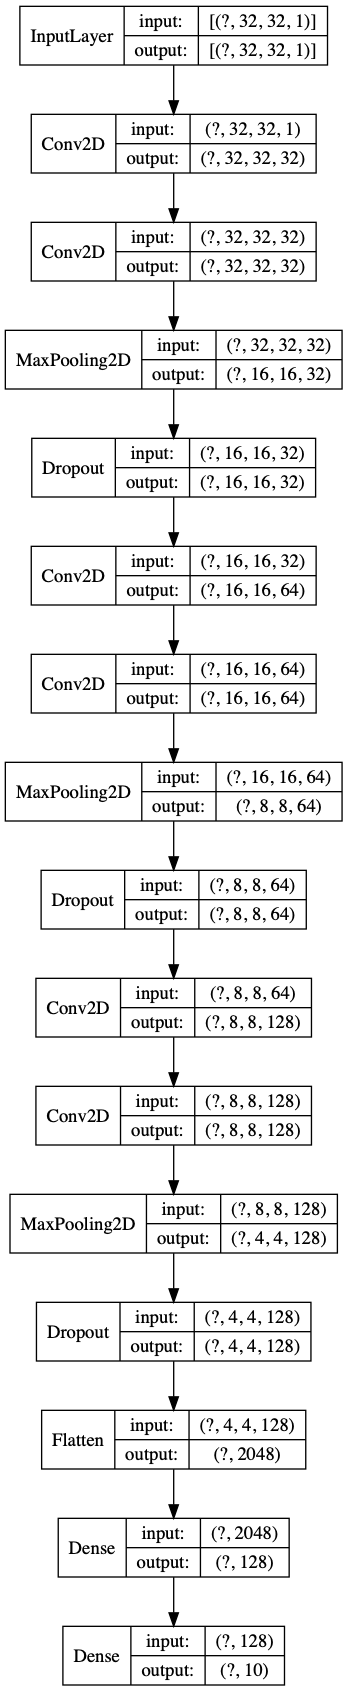

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

Using a width and high shift of 0.1, accuracy is 95%. Flipping, shearing, and rotating did not improve the results, and using large augmentations dramatically decreased accuracy. It makes sense that flipping would not help in particular because it is likely very rare that street numbers are flipped. Adding augmentation maintains validation accuracy but decreases training accuracy. It also increases time until convergence.  (length: 427)



Max val score: 94.81%


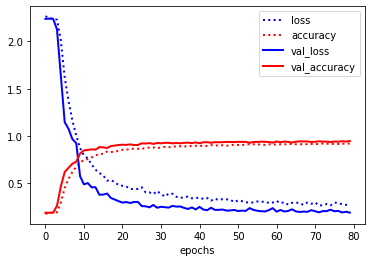


train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

From the confusion matrix, one can see that 1 and 7 are confused the most often. The misclassified images are nearly unintelligable to the human eye so it is understandable that the model could not classify. 0: blurred or have a shadow 1: dark or have seriffs 2: blurred or have multiple numbers 3: pixelated and unintelligable 4: whited out or blurred 5: blur or have another number 6: blur 7: other numbers or high contrast 8: other numbers or blur 9: blur or in block letters  (length: 480)

Test score: 0.94%


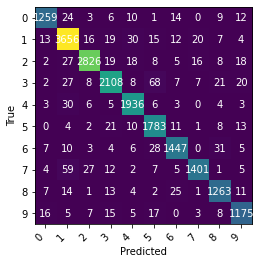

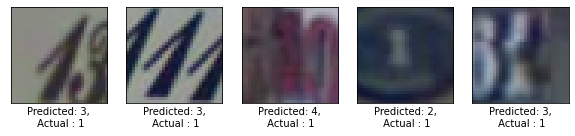

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

Filters 3, 4, 7, 12, 18, and 24 have no discernable patterns Filter 6 highlights the numbers the most, whereas filter 9, 15, 20, 21, and 29 darken the outlines of the numbers. Filters 14, 19, 22, 27, 28, 32 completely darkens the background and colored the numbers. Filters 9, 20, and 25 highlight the backgrounds more than the other filters.  (length: 344)



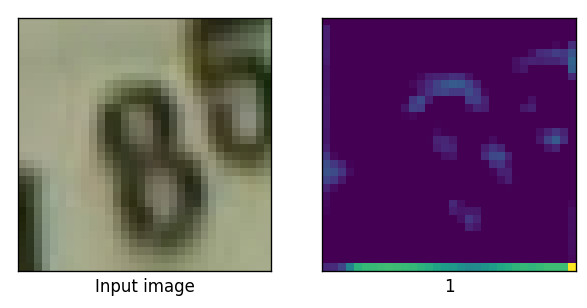

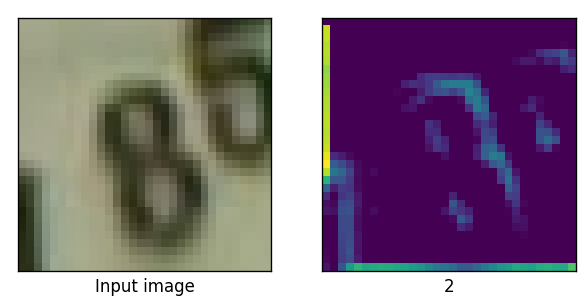

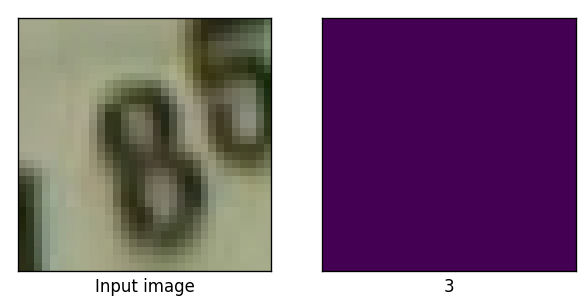

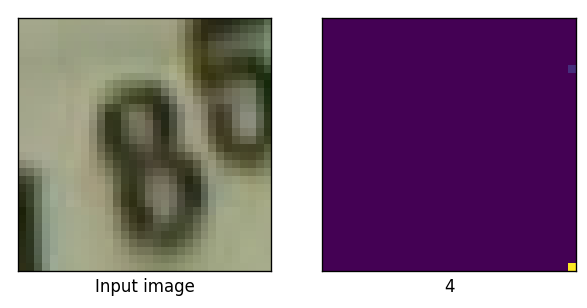

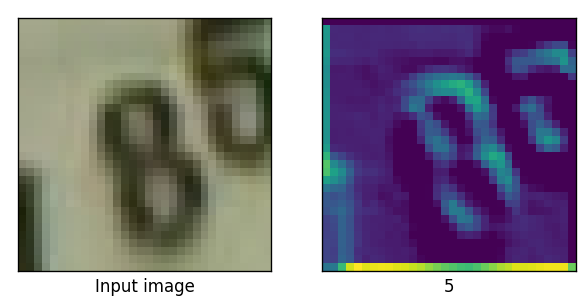

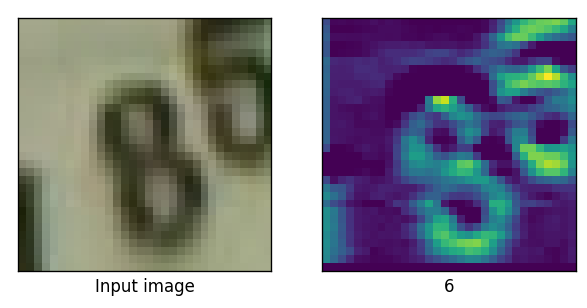

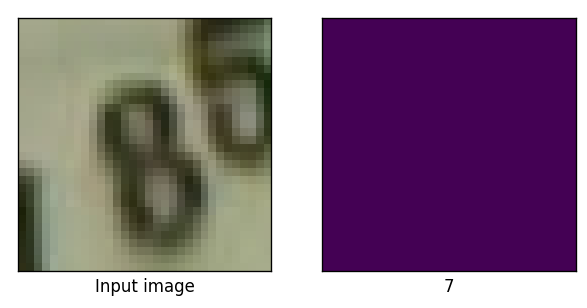

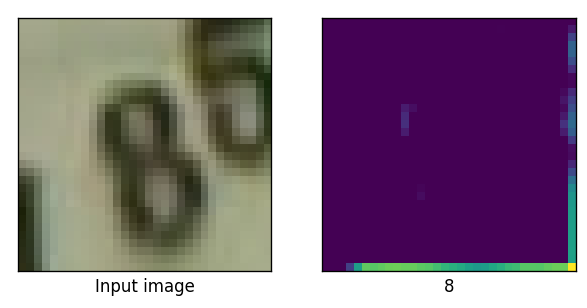

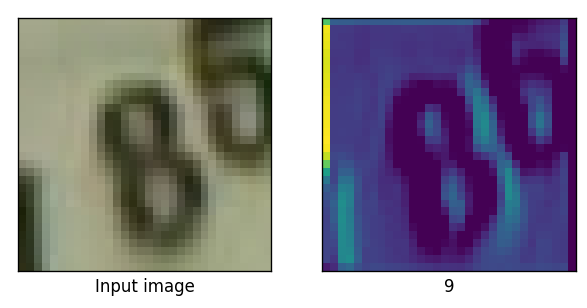

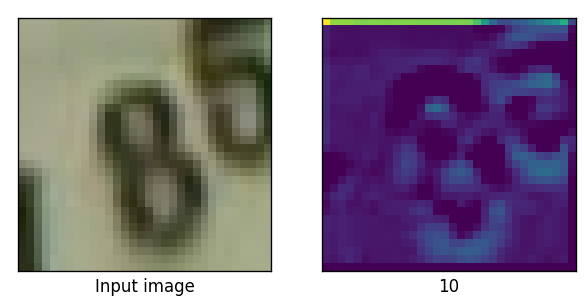

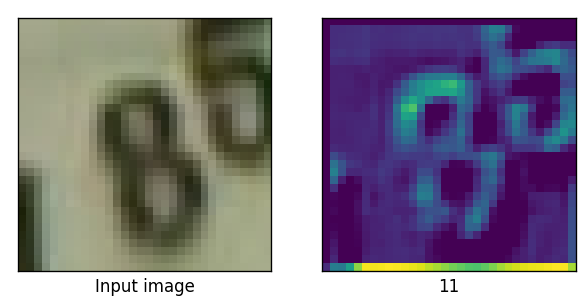

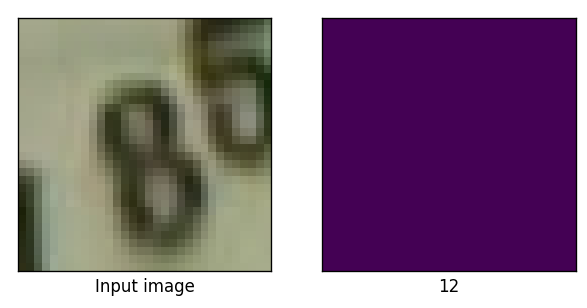

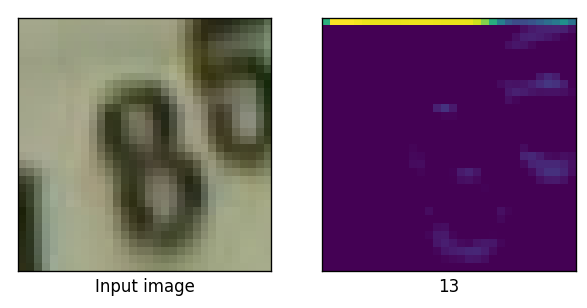

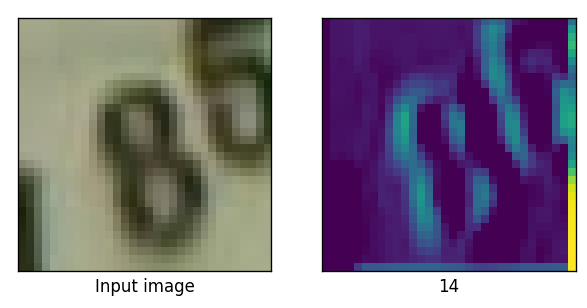

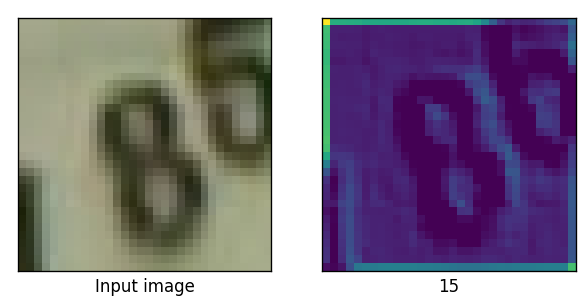

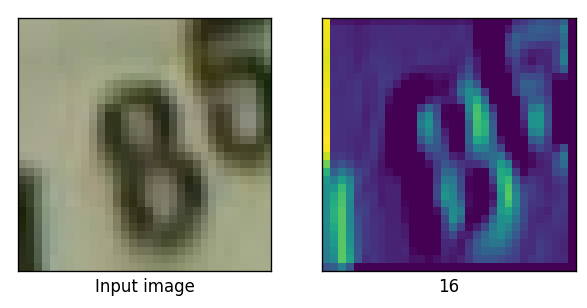

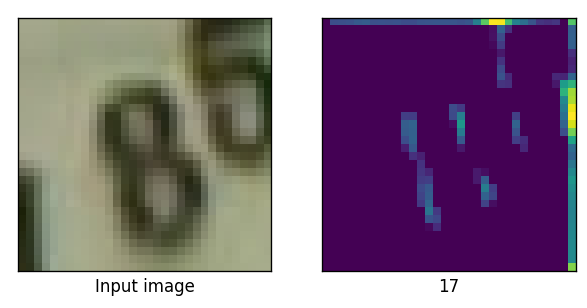

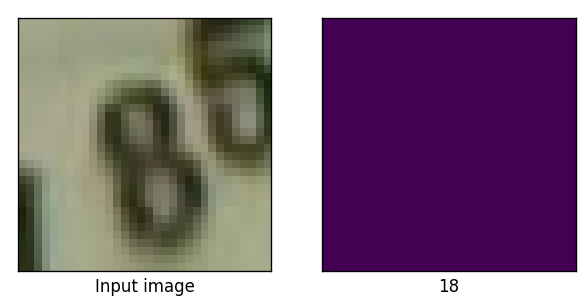

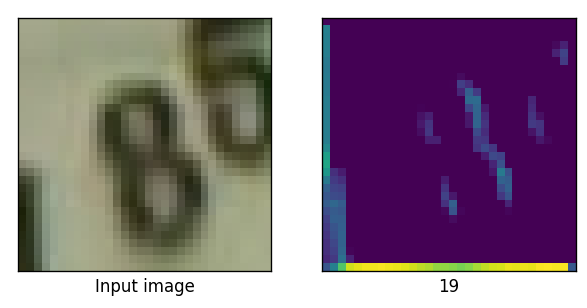

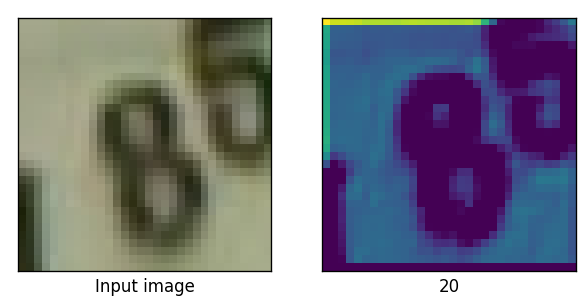

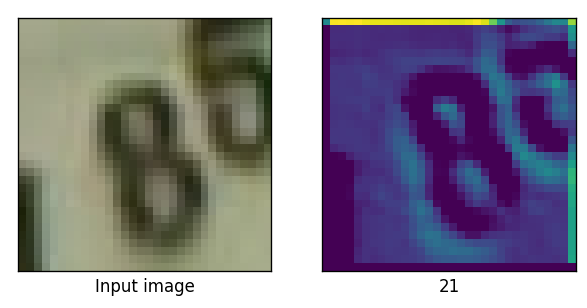

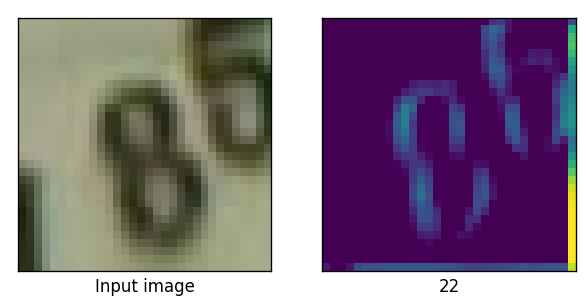

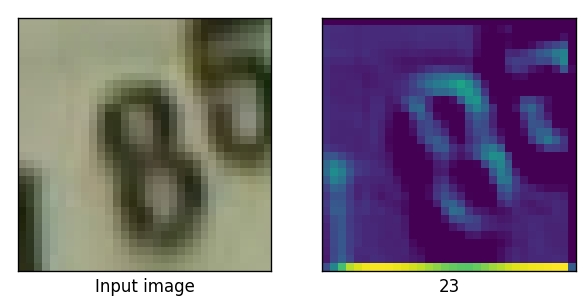

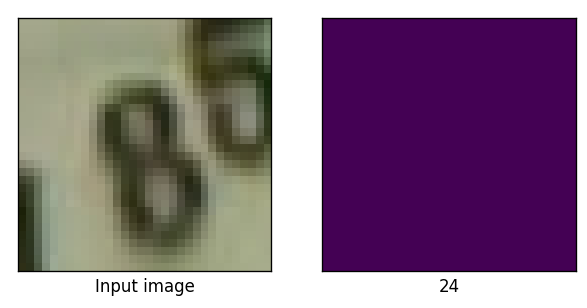

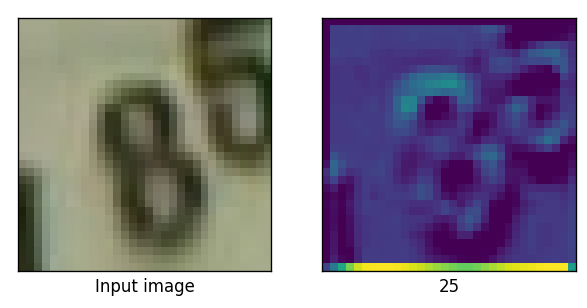

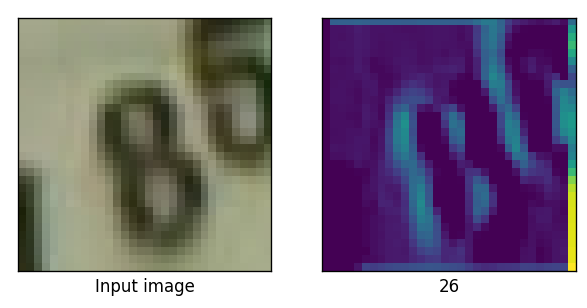

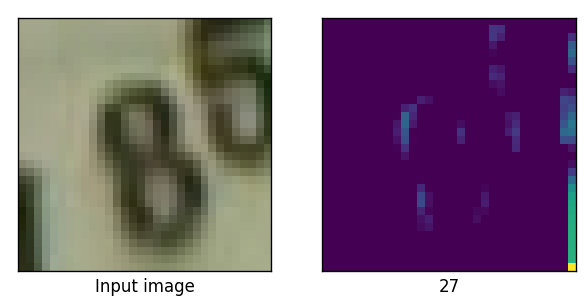

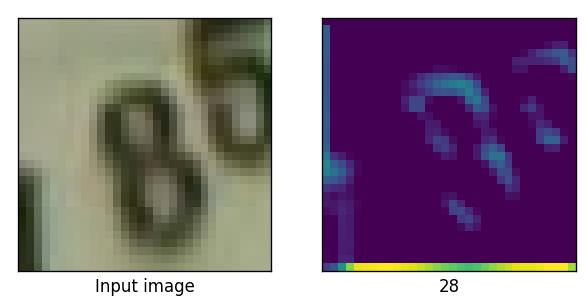

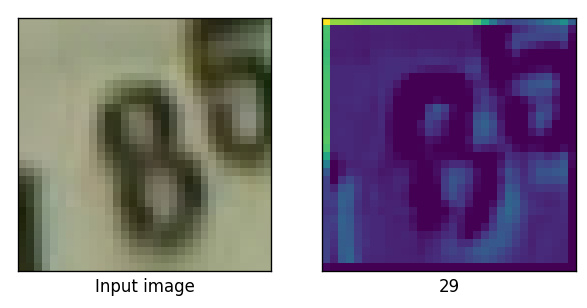

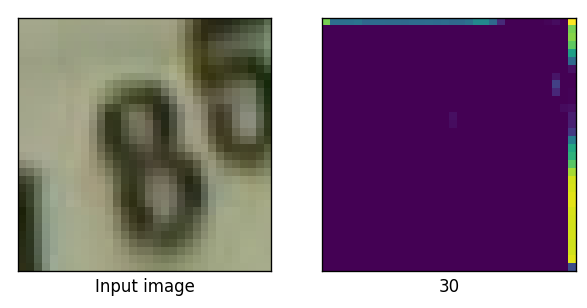

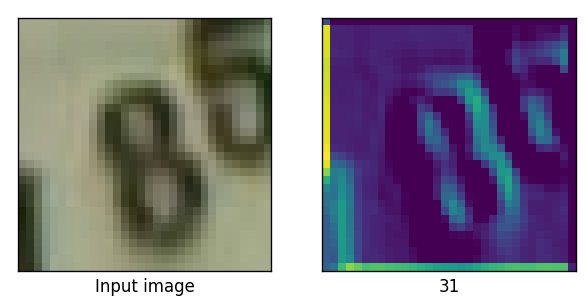

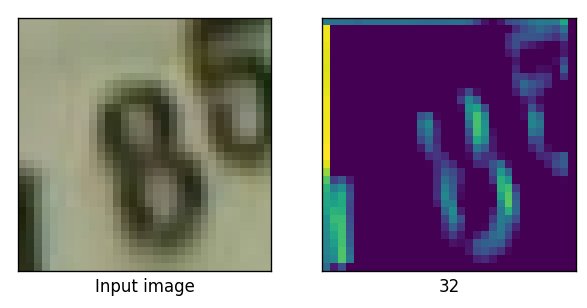

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

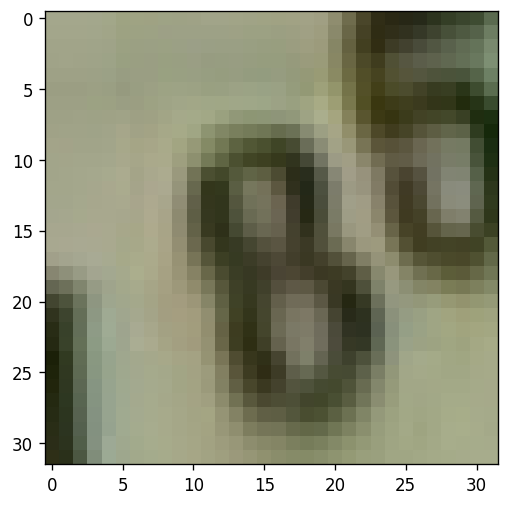

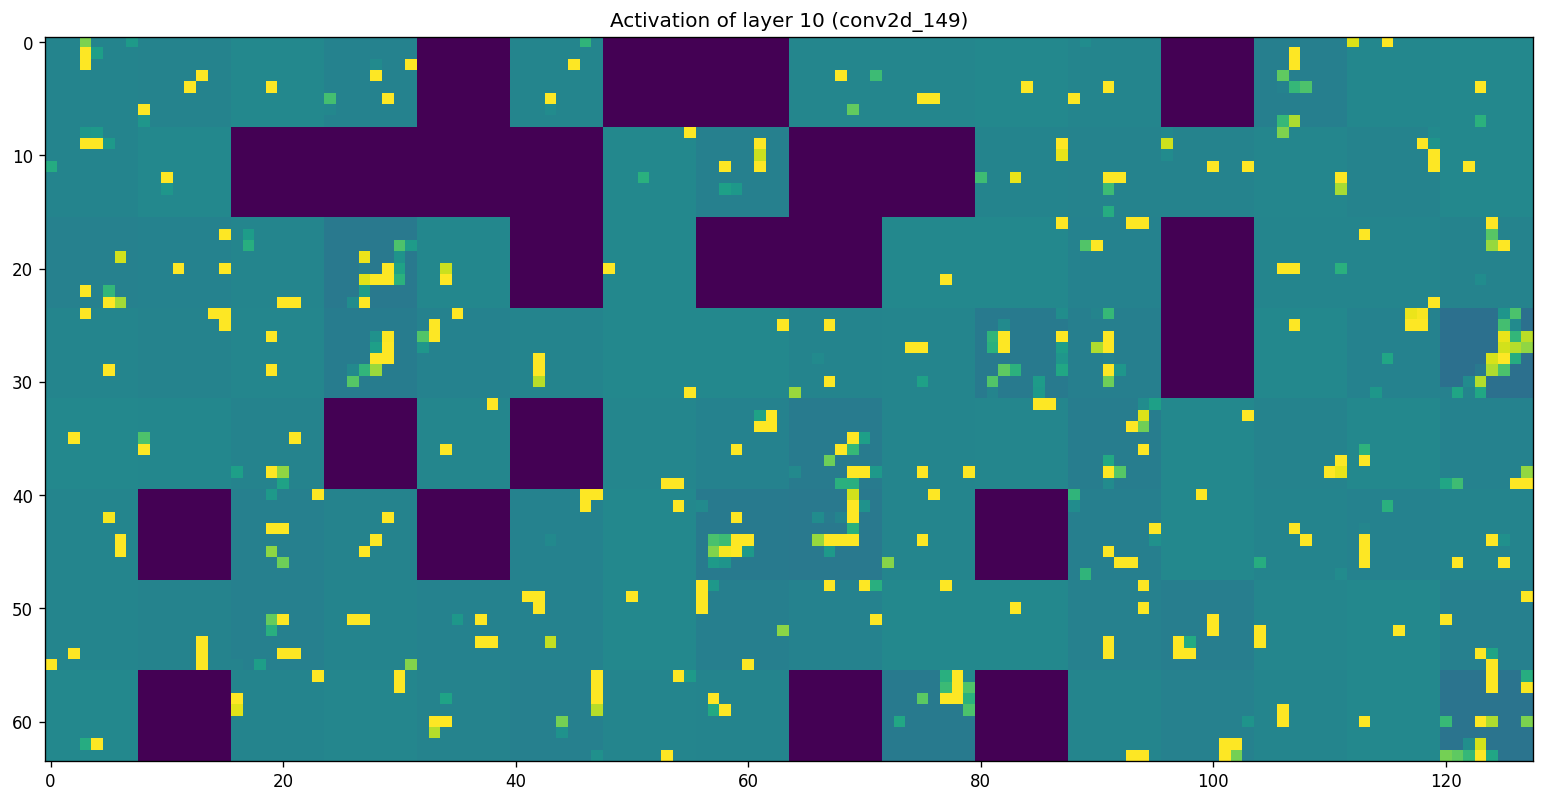

def plot_3_3():
    layer_index = 9
    fig, axes = plt.subplots(1, 1,  figsize=(10, 5))
    img_tensor = X_test[0]
    axes.imshow(img_tensor)
    plt.show()
    
    start = layer_index
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
        

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

Unfreezing a covolutional layer imporves accuracy. The validation accuracy is 81% with layer block5_conv1 unfrozen, a layer of batch normalization, a dense hidden layer with 128 nodes, and a small learning rate (1e-5). Having more than one unfrozen layer or a larger learning rate made the model overfit, and having multiple dense hidden layers with more nodes did not improve performance. The model starts to significantly overfit past 25 epochs.  (length: 449)



Max val score: 81.45%


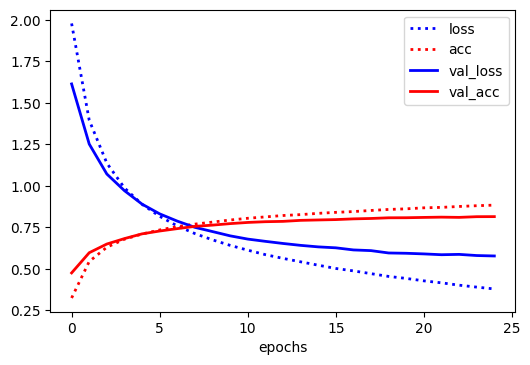

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
batch_normalization_6 (Batch (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 14,783,690
Trainable params: 2,427,786
Non-trainable params: 12,355,904
_________________________________________________________________
None
def build_model_4_1():
  # include_top=False does not import the dense layers
  base_model = tf

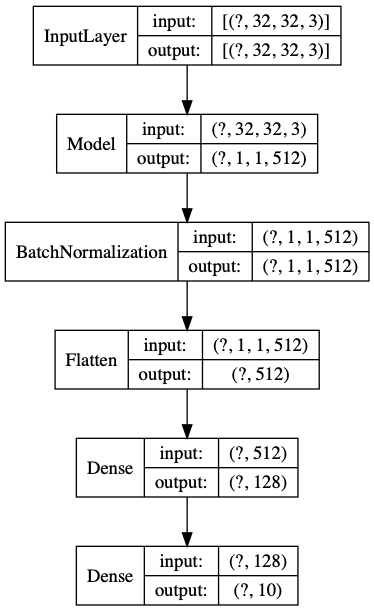

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

I used a sample of 14000 training 2000 validation and test embeddings with the Gamma auto ML tool to find the best pipeline. The result was a multiniminalNB using the TargetEncoder, SimpleImputer, and PolynomialFeatures, despite it not making logical sense to use the encoder and imputer. Using 10-fold cross validation, the test accuracy was 78.1%, which is not as good as some of the previous models.  (length: 404)

Pipeline(steps=[('3', TargetEncoder(cols=[])),
                ('2', SimpleImputer(strategy='median')),
                ('1', PolynomialFeatures(include_bias=False)),
                ('0', MultinomialNB(alpha=0.01, fit_prior=False))])
def store_embeddings(X_train, y_train, X_val, y_val, X_test, y_test):
  """ Stores all necessary embeddings to file
  """
  # load model 4.1
  model = load_model_from_file(base_dir, "model_4_1")

  # remove dense hidden layer
  base_model = model.layers[0]

  base_model.compile(loss='categorical_crossentropy', 
                  optimizer=optim

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 22.25 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
